# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Nanda Diaztomo
- **Email:** ndiaztom@gmail.com
- **ID Dicoding:** diazfrezen56

## Menentukan Pertanyaan Bisnis

- Apa saja faktor yang berpotensi memengaruhi keputusan seseorang untuk meminjam sepeda?
- Bagaimana tren peminjaman sepeda dari tahun 2011 sampai 2012?

## Import Semua Packages/Library yang Digunakan

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [99]:
day_bike = pd.read_csv('https://drive.usercontent.google.com/download?id=18NXyQM4BhGnnePpMK39yU5YkRw_KsJ9V&export=download&authuser=0&confirm=t&uuid=5b92b349-7fd8-43c3-83a6-8a6acf97b686&at=APcXIO2MJ12NiyBfCMkizKzq-7xw:1771957499792')
hour_bike = pd.read_csv('https://drive.usercontent.google.com/download?id=1sK7VCZDMmN1MDp05HFVqtyb3RGlARWEf&export=download&authuser=0&confirm=t&uuid=c89507b5-c87d-4601-bfdc-d7e27cfcbb36&at=APcXIO0ISEf4qQKqEFuQP2lQKfsU:1771957463129')

display(day_bike.head())
display(hour_bike.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_bike adalah data peminjaman sepeda dengan jeda waktu hari. Data ini cocok untuk melihat angka peminjaman sepeda dari hari ke hari pada baik pada hari kerja, libur, dan pergantian musim.   
- hour_bike adalah data peminjaman sepeda degan jeda waktu jam. Data ini cocok untuk melihat angka peminjaman sepeda pada jam-jam tertentu, seperti saat jam sibuk ataupun pada tiap pembagian waktu seperti pagi, siang, sore, dan malam.

### Assessing Data

#### Assesing data meliputi mengecek data hilang, duplikat, kejelasan nilai, serta kesesuaian tipe data pada kedua data.

In [100]:
print("Tabel Deskriptif Data Harian Peminjaman Sepeda:")
display(day_bike.describe(include='all').T)
print("Tabel Jumlah Data yang Hilang di Data Harian Peminjaman Sepeda:")
display(day_bike.isna().sum())
print("Jumlah duplikat:",day_bike.duplicated().sum())
print("Ringkasan Data Harian Peminjaman Sepeda")
display(day_bike.info())

Tabel Deskriptif Data Harian Peminjaman Sepeda:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2012-12-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


Tabel Jumlah Data yang Hilang di Data Harian Peminjaman Sepeda:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Jumlah duplikat: 0
Ringkasan Data Harian Peminjaman Sepeda
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

In [101]:
print("Tabel Deskriptif Data Tiap Jam Peminjaman Sepeda:")
display(hour_bike.describe(include='all').T)
print("Tabel Jumlah Data yang Hilang di Data Tiap Jam Peminjaman Sepeda:")
display(hour_bike.isna().sum())
print("Jumlah duplikat:",hour_bike.duplicated().sum())
print("Ringkasan Data Tiap Jam Peminjaman Sepeda")
display(hour_bike.info())

Tabel Deskriptif Data Tiap Jam Peminjaman Sepeda:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2012-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


Tabel Jumlah Data yang Hilang di Data Tiap Jam Peminjaman Sepeda:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Jumlah duplikat: 0
Ringkasan Data Tiap Jam Peminjaman Sepeda
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usa

None

**Insight:**
- Tidak ditemukan adanya *missing value* dan nilai duplikat pada tiap dataset, maka tidak perlu adanya filling missing value ataupun drop data duplikat.
- Drop kolom instant(id), perbaikan beberapa tipe data feature menjadi kategorik (season, yr, mnth, holiday, weekday, workingday, weathersit), dan dteday menjadi datetime
- kolom temp, atemp, hum, windspeed yang sudah di-normalized akan diubah kebentuk nilai asalnya agar maknanya mudah dimengerti (nilai min dan max berdasarkan: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset).
- Drop kolom temepratur di day_bike karena kurang bermakna (tmax dan tmin tidak diketahui)


### Cleaning Data

In [102]:
day_bike.drop("instant",axis=1,inplace=True)

day_bike['season'] = day_bike['season'].map({
                    1:'winter',
                    2:'spring',
                    3:'summer',
                    4:'fall'
})
day_bike['season'] = pd.Categorical(day_bike['season'],
                    categories=['winter','spring','summer','fall'], ordered=True)

day_bike['yr'] = day_bike['yr'].map({
                  0:'2011',
                  1:'2012'
})

day_bike['yr'] = pd.Categorical(day_bike['yr'],
                    categories=['2011','2012'], ordered=True)

day_bike['mnth'] = day_bike['mnth'].map({
                  1:"january",2:"february",3:"march",4:"april",
                  5:"may",6:"june",7:"july",8:"august",
                  9:"september",10:"october",11:"november",12:"december"
})
day_bike['mnth'] = pd.Categorical(day_bike['mnth'],
                    categories=["january","february","march","april",
                                "may","june","july","august","september",
                                "october","november","december"], ordered=True)


day_bike['holiday'] = day_bike['holiday'].map({0:'No',1:'Yes'})
day_bike['holiday'] = day_bike['holiday'].astype('category')


day_bike['weekday'] = day_bike['weekday'].map({0:"Sunday",1:"Monday",
                                               2:"Tuesday",3:"Wednesday",
                                               4:"Thursday",5:"Friday",6:"Saturday"})
day_bike['weekday'] = pd.Categorical(day_bike['weekday'],
                    categories=["Monday","Tuesday","Wednesday",
                                "Thursday","Friday","Saturday","Sunday"], ordered=True)


day_bike['workingday'] = day_bike['workingday'].map({0:'No',1:'Yes'})
day_bike['workingday'] = day_bike['workingday'].astype('category')

day_bike['weathersit'] = day_bike['weathersit'].map({1:'clear',2:'cloudy',
                                                     3:'light rain/snow',
                                                     4:'heavy rain/snow'})
day_bike['weathersit'] = pd.Categorical(day_bike['weathersit'],
                    categories=["clear","cloudy","light rain/snow",
                                "heavy rain/snow"], ordered=True)

day_bike['dteday'] = pd.to_datetime(day_bike['dteday'])
day_bike['hum'] = day_bike['hum']*100
day_bike['windspeed'] = day_bike['windspeed']*67
day_bike['atemp'] = day_bike['atemp']*50
day_bike['temp'] = day_bike['temp']*41

In [103]:
day_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,2011,january,No,Saturday,No,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,winter,2011,january,No,Sunday,No,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,winter,2011,january,No,Monday,Yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,winter,2011,january,No,Tuesday,Yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,winter,2011,january,No,Wednesday,Yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [104]:
day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.3

In [105]:
hour_bike.drop("instant",axis=1,inplace=True)

hour_bike['season'] = hour_bike['season'].map({
                    1:'winter',
                    2:'spring',
                    3:'summer',
                    4:'fall'
})
hour_bike['season'] = pd.Categorical(hour_bike['season'],
                    categories=['winter','spring','summer','fall'], ordered=True)

hour_bike['yr'] = hour_bike['yr'].map({
                  0:'2011',
                  1:'2012'
})

hour_bike['yr'] = pd.Categorical(hour_bike['yr'],
                    categories=['2011','2012'], ordered=True)

hour_bike['mnth'] = hour_bike['mnth'].map({
                  1:"january",2:"february",3:"march",4:"april",
                  5:"may",6:"june",7:"july",8:"august",
                  9:"september",10:"october",11:"november",12:"december"
})
hour_bike['mnth'] = pd.Categorical(hour_bike['mnth'],
                    categories=["january","february","march","april",
                                "may","june","july","august","september",
                                "october","november","december"], ordered=True)


hour_bike['holiday'] = hour_bike['holiday'].map({0:'No',1:'Yes'})
hour_bike['holiday'] = hour_bike['holiday'].astype('category')


hour_bike['weekday'] = hour_bike['weekday'].map({0:"Sunday",1:"Monday",
                                               2:"Tuesday",3:"Wednesday",
                                               4:"Thursday",5:"Friday",6:"Saturday"})
hour_bike['weekday'] = pd.Categorical(hour_bike['weekday'],
                    categories=["Sunday","Monday","Tuesday","Wednesday",
                                "Thursday","Friday","Saturday"], ordered=True)


hour_bike['workingday'] = hour_bike['workingday'].map({0:'Rest',1:'Work'})
hour_bike['workingday'] = hour_bike['workingday'].astype('category')

hour_bike['weathersit'] = hour_bike['weathersit'].map({1:'clear',2:'cloudy',
                                                     3:'light rain/snow',
                                                     4:'heavy rain/snow'})
hour_bike['weathersit'] = pd.Categorical(hour_bike['weathersit'],
                    categories=["clear","cloudy","light rain/snow",
                                "heavy rain/snow"], ordered=True)

hour_bike['temp'] = hour_bike['temp']*(39-(-8)) - 8
hour_bike['atemp'] = hour_bike['atemp']*(50-(-16)) - 16

hour_bike['hum'] = hour_bike['hum']*100
hour_bike['windspeed'] = hour_bike['windspeed']*67

hour_bike['dteday'] = pd.to_datetime(hour_bike['dteday'])
hour_bike['dteday'] = hour_bike['dteday'] + pd.to_timedelta(hour_bike['hr'],unit='h')
hour_bike.rename(columns={'dteday': 'timestamp'}, inplace=True)

hour_bike['day'] = np.where(
    (hour_bike["hr"] >= 6) & (hour_bike["hr"] < 18),
    "day",
    "night"
)

In [106]:
hour_bike.head()

,timestamp,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01 00:00:00,winter,2011,january,0,No,Saturday,Rest,clear,3.28,3.0014,81.0,0.0,3,13,16,night
1,2011-01-01 01:00:00,winter,2011,january,1,No,Saturday,Rest,clear,2.34,1.9982,80.0,0.0,8,32,40,night
2,2011-01-01 02:00:00,winter,2011,january,2,No,Saturday,Rest,clear,2.34,1.9982,80.0,0.0,5,27,32,night
3,2011-01-01 03:00:00,winter,2011,january,3,No,Saturday,Rest,clear,3.28,3.0014,75.0,0.0,3,10,13,night
4,2011-01-01 04:00:00,winter,2011,january,4,No,Saturday,Rest,clear,3.28,3.0014,75.0,0.0,0,1,1,night


In [107]:
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
 16  day         17379 non-

**Insight:**
- Kedua data sudah dibersihkan untuk dieksplorasi untuk melihat asosiasi dengan variabel kategorik ataupun korelasinya dengan variabel kontinu dengan jumlah peminjam sepeda.
- Eksplorasi data akan mudah terlihat dengan

## Exploratory Data Analysis (EDA)

### Explore ...

In [108]:
day_bike.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,summer,2012,january,No,Monday,Yes,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [109]:
hour_bike.describe(include='all')

,timestamp,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,summer,2012,july,NaN,No,Saturday,Work,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8735
mean,2012-01-02 15:41:22.858622464,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 22:30:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 21:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 06:30:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,2012-12-31 23:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


In [110]:
day_bike.groupby(by=["yr"]).agg({
    "casual": ["max", "min", "mean", "std","sum"],
    "registered" : ["max", "min", "mean", "std","sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

/tmp/ipython-input-3762505985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by=["yr"]).agg({


casual                                      registered                    \
        max min         mean         std     sum        max  min         mean   
yr                                                                              
2011   3065   9   677.402740  556.269121  247252       4614  416  2728.358904   
2012   3410   2  1018.483607  758.989897  372765       6946   20  4581.450820   

                             cnt                                          
              std      sum   max  min         mean          std      sum  
yr                                                                        
2011  1060.110413   995851  6043  431  3405.761644  1378.753666  1243103  
2012  1424.331846  1676811  8714   22  5599.934426  1788.667868  2049576

In [111]:
day_bike.groupby(by=["season","yr"]).agg({
    "casual": ["max", "min", "mean", "std","sum"],
    "registered" : ["max", "min", "mean", "std","sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

/tmp/ipython-input-3812088644.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by=["season","yr"]).agg({


casual                                       registered        \
               max  min         mean         std     sum        max   min   
season yr                                                                   
winter 2011   1424    9   238.055556  252.609365   21425       2841   416   
       2012   3155    9   430.736264  467.745345   39197       5315   432   
spring 2011   2355  121   843.086957  520.552109   77564       4414   674   
       2012   3410  120  1369.108696  826.568007  125958       6456   907   
summer 2011   3065  118  1015.425532  554.916801   95450       4614   889   
       2012   3160  371  1389.797872  579.161622  130641       6917  3195   
fall   2011   2397   50   593.404494  504.441967   52813       4372   570   
       2012   3031    2   864.820225  669.109356   76969       6946    20   

                                                cnt                     \
                    mean          std     sum   max   min         mean   
season yr                                                                
winter 2011  1428.611111   497.286269  128575  3239   431  1666.666667   
       2012  3100.560440  1109.648415  282151  7836   441  3531.296703   
spring 2011  2932.086957   906.775638  269752  5805   795  3775.173913   
       2012  4840.380435  1010.116910  445315  8362  1027  6209.489130   
summer 2011  3448.936170   677.857596  324200  6043  1115  4464.361702   
       2012  5434.446809   985.186535  510838  8714  4073  6824.244681   
fall   2011  3071.056180   786.175110  273324  5511   627  3664.460674   
       2012  4927.044944  1355.921499  438507  8555    22  5791.865169   

                                  
                     std     sum  
season yr                         
winter 2011   614.012663  150000  
       2012  1341.203270  321348  
spring 2011  1138.901028  347316  
       2012  1221.345569  571273  
summer 2011   798.348077  419650  
       2012   912.756191  641479  
fall   2011   983.006128  326137  
       2012  1598.520901  515476

In [112]:
day_bike.groupby(by=["holiday","workingday"]).agg({
    "casual": ["max", "min", "mean", "std","sum"],
    "registered" : ["max", "min", "mean", "std","sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

/tmp/ipython-input-1164389750.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by=["holiday","workingday"]).agg({


casual                                         registered  \
                       max    min         mean         std     sum        max   
holiday workingday                                                              
No      No          3410.0   54.0  1401.776190  870.442742  294373     5966.0   
        Yes         2469.0    2.0   606.570000  391.496032  303285     6946.0   
Yes     No          3065.0  117.0  1064.714286  860.046809   22359     5172.0   
        Yes            NaN    NaN          NaN         NaN       0        NaN   

                                                                 cnt          \
                      min         mean          std      sum     max     min   
holiday workingday                                                             
No      No          451.0  2987.909524  1272.722485   627461  8714.0   605.0   
        Yes          20.0  3978.250000  1568.692453  1989125  8362.0    22.0   
Yes     No          573.0  2670.285714  1492.860246    56076  7403.0  1000.0   
        Yes           NaN          NaN          NaN        0     NaN     NaN   

                                                       
                           mean          std      sum  
holiday workingday                                     
No      No          4389.685714  2042.527458   921834  
        Yes         4584.820000  1878.415583  2292410  
Yes     No          3735.000000  2103.350660    78435  
        Yes                 NaN          NaN        0

In [113]:
day_bike.groupby(by="weathersit").agg({
    "casual": ["max", "min", "mean", "std","sum"],
    "registered" : ["max", "min", "mean", "std","sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

/tmp/ipython-input-1088602516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by="weathersit").agg({


casual                                       registered  \
                    max   min        mean         std     sum        max   
weathersit                                                                 
clear            3410.0  15.0  964.030238  700.476488  446346     6946.0   
cloudy           3155.0   9.0  687.352227  619.082767  169776     6844.0   
light rain/snow  1264.0   2.0  185.476190  260.975022    3895     4324.0   
heavy rain/snow     NaN   NaN         NaN         NaN       0        NaN   

                                                              cnt         \
                   min         mean          std      sum     max    min   
weathersit                                                                 
clear            416.0  3912.755940  1533.347265  1811606  8714.0  431.0   
cloudy           491.0  3348.510121  1463.566884   827082  8362.0  605.0   
light rain/snow   20.0  1617.809524  1068.290954    33974  4639.0   22.0   
heavy rain/snow    NaN          NaN          NaN        0     NaN    NaN   

                                                    
                        mean          std      sum  
weathersit                                          
clear            4876.786177  1879.483989  2257952  
cloudy           4035.862348  1809.109918   996858  
light rain/snow  1803.285714  1240.284449    37869  
heavy rain/snow          NaN          NaN        0

In [114]:
hour_bike.groupby(by='hr').agg({
    "casual": ["max", "min", "mean", "std","sum"],
    "registered" : ["max", "min", "mean", "std","sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

casual                                  registered                  \
      max min       mean        std    sum        max min        mean   
hr                                                                      
0      68   0  10.158402  10.667953   7375        234   0   43.739669   
1      49   0   6.504144   7.735334   4709        139   0   26.871547   
2      44   0   4.772028   6.514780   3412        104   0   18.097902   
3      26   0   2.715925   4.315795   1893         61   0    9.011478   
4      13   0   1.253945   1.887669    874         22   0    5.098996   
5      16   0   1.411437   1.790581   1012         64   0   18.478382   
6      19   0   4.161379   3.691509   3017        203   0   71.882759   
7      40   0  11.055021   8.356205   8037        572   1  201.009629   
8      69   0  21.679505  13.741229  15761        808   4  337.331499   
9     142   0  30.891334  24.472856  22458        399   6  188.418157   
10    209   0  46.477304  41.346206  33789        351   8  127.191197   
11    268   0  59.540578  54.481788  43286        446   5  148.602476   
12    362   0  68.293956  64.394237  49718        526   3  185.021978   
13    355   0  72.308642  69.819228  52713        491   9  181.352538   
14    361   0  75.567901  71.599225  55089        502  12  165.381344   
15    357   0  74.905350  70.289359  54606        456   4  176.327846   
16    367   0  73.745205  67.015206  53834        481   8  238.238356   
17    347   0  74.273973  61.491021  54220        885  14  387.178082   
18    266   0  61.120879  50.981553  44496        886  20  364.390110   
19    230   0  48.770604  42.328913  35505        662  11  262.752747   
20    237   0  36.233516  32.103347  26378        461   8  189.796703   
21    222   0  28.255495  25.378252  20570        362   6  144.059066   
22    175   0  22.252747  20.450211  16200        327   5  109.082418   
23     71   0  15.199176  13.804596  11065        220   2   72.631868   

                        cnt                                      
           std     sum  max min        mean         std     sum  
hr                                                               
0    34.019585   31755  283   2   53.898072   42.307910   39130  
1    27.344153   19455  168   1   33.375691   33.538727   24164  
2    21.303895   12940  132   1   22.869930   26.578642   16352  
3     9.743691    6281   79   1   11.727403   13.239190    8174  
4     3.134479    3554   28   1    6.352941    4.143818    4428  
5    12.674751   13249   66   1   19.889819   13.200765   14261  
6    53.535307   52115  213   1   76.044138   55.084348   55132  
7   157.120459  146134  596   1  212.064649  161.441936  154171  
8   229.698404  245240  839   5  359.011004  235.189285  261001  
9    84.633490  136980  426  14  219.309491   93.703458  159438  
10   66.281668   92468  539   8  173.668501  102.205413  126257  
11   79.090301  108034  663  10  208.143054  127.495536  151320  
12   89.240873  134696  776   3  253.315934  145.081134  184414  
13   87.424775  132206  760  11  253.661180  148.107657  184919  
14   84.055205  120563  750  12  240.949246  147.271574  175652  
15   84.488219  128543  750   7  251.233196  144.632541  183149  
16  103.765726  173914  783  11  311.983562  148.682618  227748  
17  211.676303  282640  976  15  461.452055  232.656611  336860  
18  203.599896  265276  977  23  425.510989  224.639304  309772  
19  138.708622  191284  743  11  311.523352  161.050359  226789  
20  100.293791  138172  567  11  226.030220  119.670164  164550  
21   73.149848  104875  584   6  172.314560   89.788893  125445  
22   55.252765   79412  502   9  131.335165   69.937782   95612  
23   40.446431   52876  256   2   87.831044   50.846889   63941

In [124]:
hour_bike.groupby(by='day').agg({
    "casual": ["max", "min", "median", "std","sum"],
    "registered" : ["max", "min", "median", "std","sum"],
    "cnt" : ["max", "min", "median", "std","sum"]
})

casual                               registered                         \
         max min median        std     sum        max min median         std   
day                                                                            
day      367   0   31.0  58.477424  446528        885   0  168.0  148.753580   
night    266   0    7.0  30.783705  173489        886   0   49.0  138.636987   

                cnt                                  
           sum  max min median         std      sum  
day                                                  
day    1753533  976   1  213.0  178.477029  2200061  
night   919129  977   1   57.0  161.402580  1092618

**Insight:**
- Ada sekitar **4505 (mean)** orang meminjam sepeda setiap harinya.
- Ada sekitar **142 (median)** orang meminjam sepeda setiap jam.
- Adanya **peningkatan jumlah peminjaman** sepeda dari **tahun 2011 (1.243.103 peminjam) ke 2012 (2.049.576 peminjam)**.
- Secara garis besar, peminjaman sepeda saat tinggi saat di **musim panas (summer)** dan sangat rendah saat **musim dingin (winter)** baik pada tahun 2011 maupun 2012.
- Peminjaman sepeda jauh **lebih tinggi saat weekend dan hari libur**.
- **Peminjaman sepeda yang tinggi (142>)** terjadi pada **jam 10 pagi hingga jam 11 malam**.
- Secara garis besar, **rata-rata peminjaman sepeda paling banyak terjadi pada siang hari (213)** dibandingkan pada saat malam (57).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja faktor yang berpotensi memengaruhi keputusan seseorang untuk meminjam sepeda?

**Melihat korelasi antara variabel numerik dengan jumlah peminjam sepeda (cnt):**

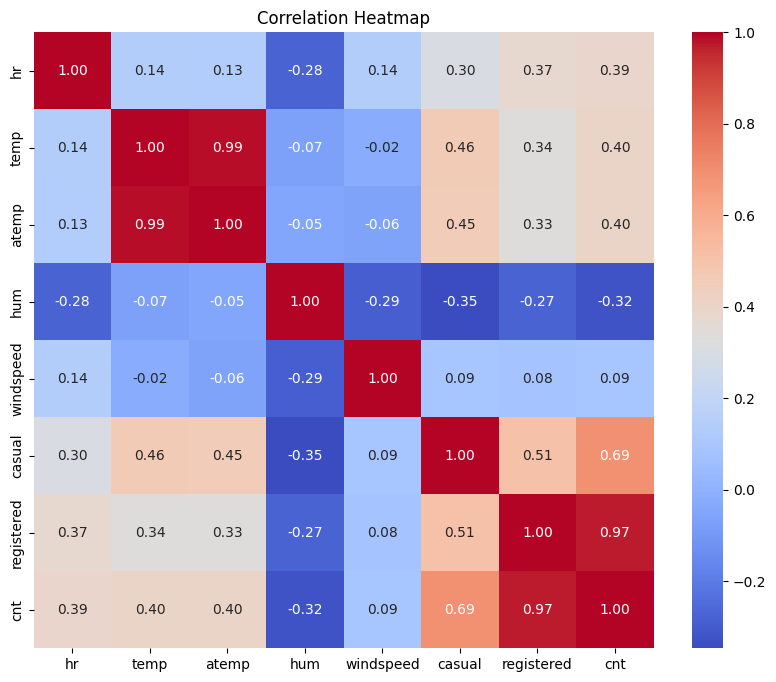

In [115]:
corr_matrix = hour_bike.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation Heatmap")
plt.show()

**Melihat pola hubungan variabel numerik dengan jumlah peminjam sepeda:**

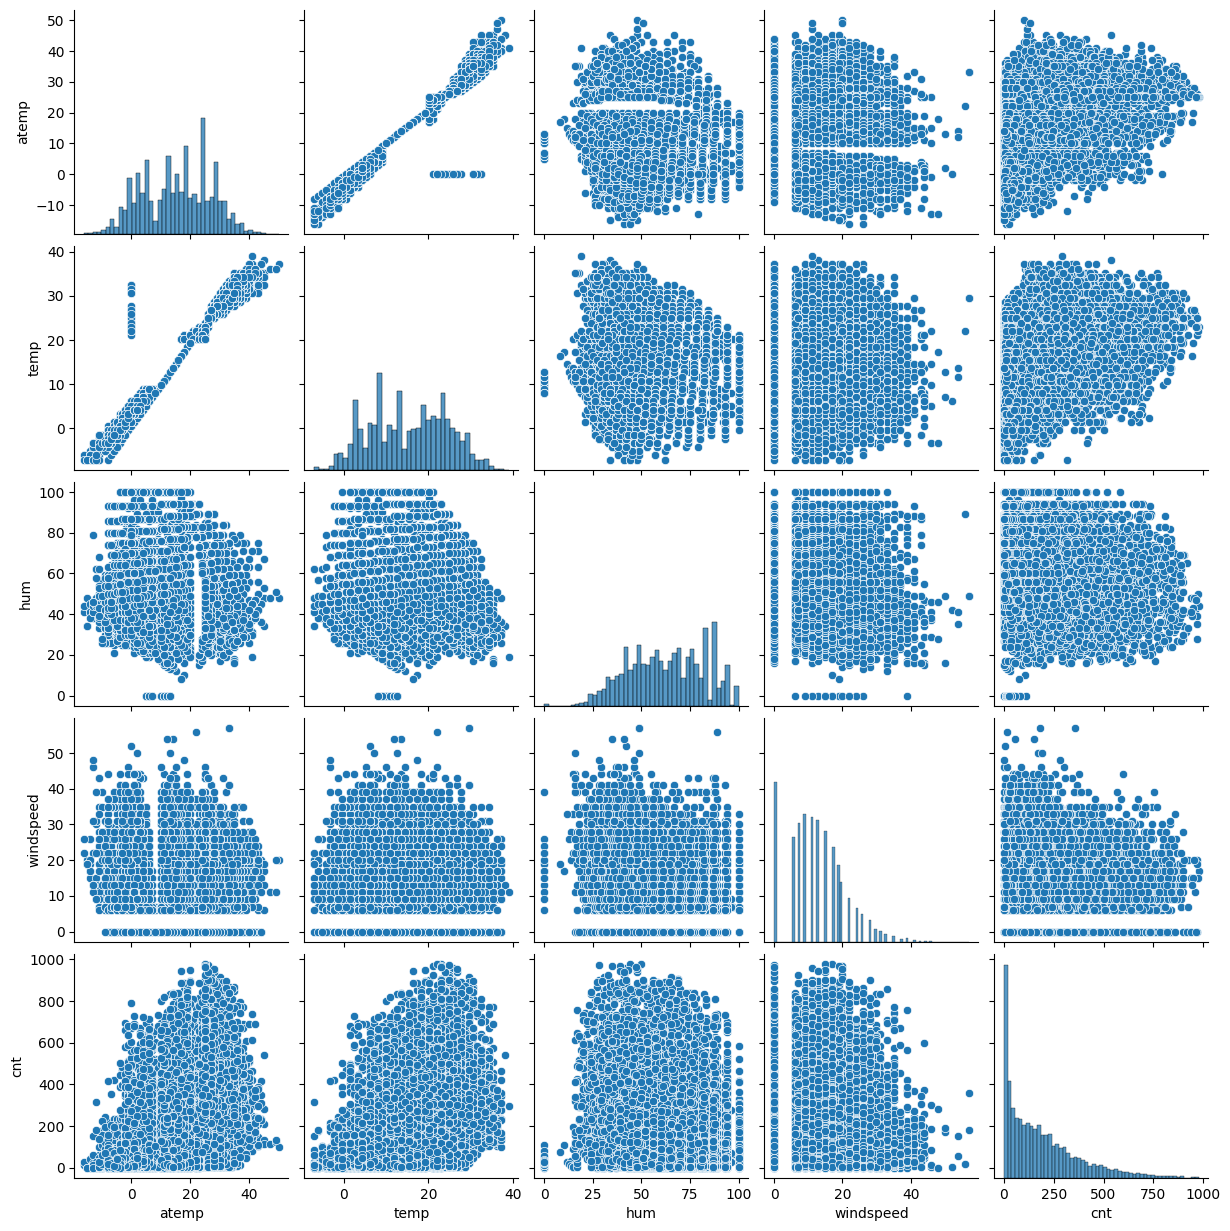

In [116]:
sns.pairplot(hour_bike[["atemp","temp", "hum", "windspeed", "cnt"]])
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan tahun dan musim:**

/tmp/ipython-input-2074130232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season = day_bike.groupby(by=["yr","season"]).agg({


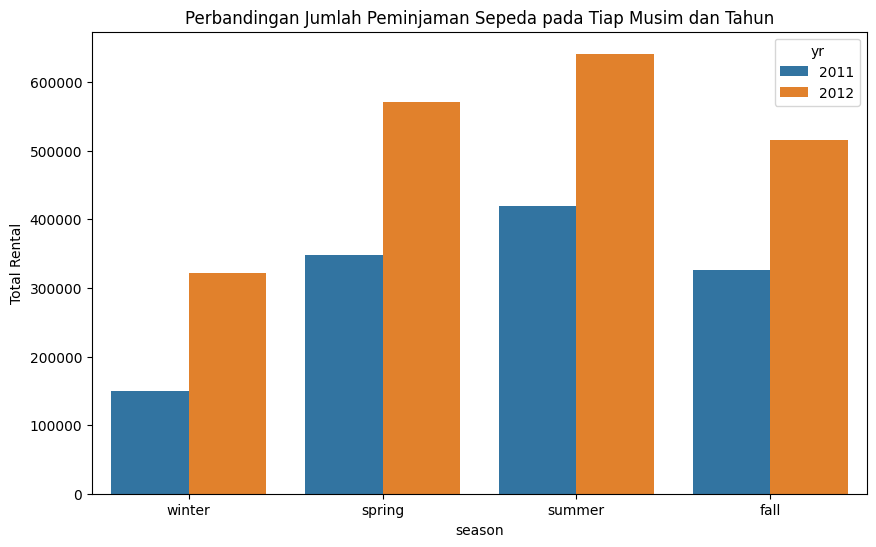

In [126]:
season = day_bike.groupby(by=["yr","season"]).agg({
    "cnt" : "sum"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=season,
    x="season",
    y="cnt",
    hue="yr"
)

plt.title("Perbandingan Jumlah Peminjaman Sepeda pada Tiap Musim dan Tahun")
plt.ylabel("Total Rental")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan cuaca:**

/tmp/ipython-input-266395610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather = day_bike.groupby(by="weathersit").agg({


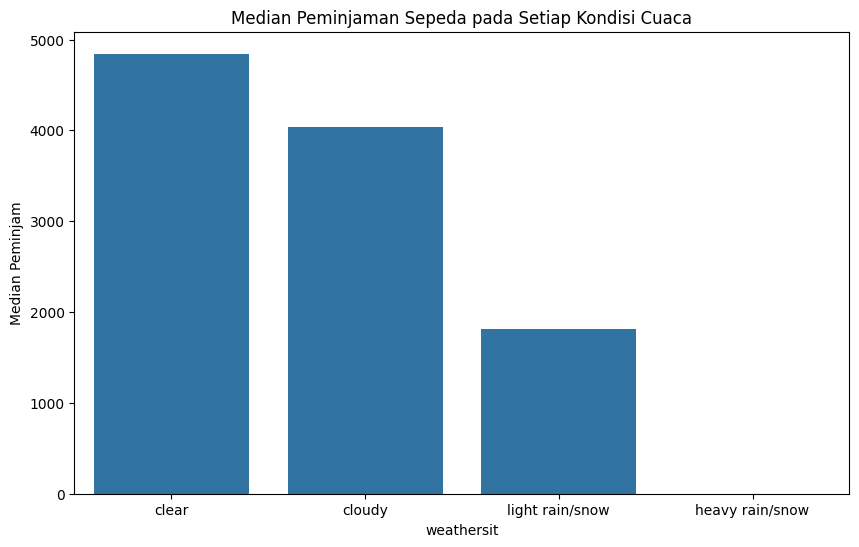

In [128]:
weather = day_bike.groupby(by="weathersit").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=weather,
    x="weathersit",
    y="cnt"

)

plt.title("Median Peminjaman Sepeda pada Setiap Kondisi Cuaca")
plt.ylabel("Median Peminjam")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan hari libur:**

/tmp/ipython-input-1662468945.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_h = day_bike.groupby(by=["holiday","weekday"]).agg({


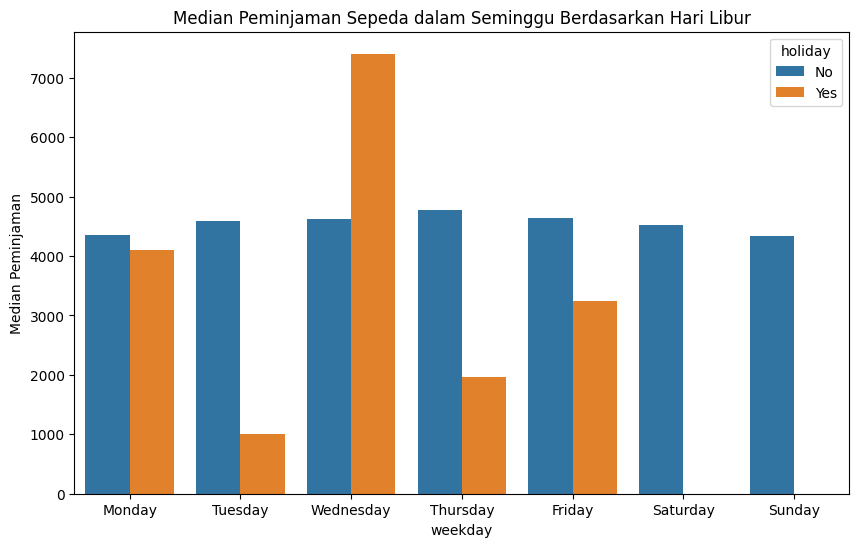

In [129]:
weekday_h = day_bike.groupby(by=["holiday","weekday"]).agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=weekday_h,
    x="weekday",
    y="cnt",
    hue="holiday"

)

plt.title("Median Peminjaman Sepeda dalam Seminggu Berdasarkan Hari Libur")
plt.ylabel("Median Peminjaman")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan hari kerja:**

/tmp/ipython-input-533170973.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_w = day_bike.groupby(by=["workingday","weekday"]).agg({


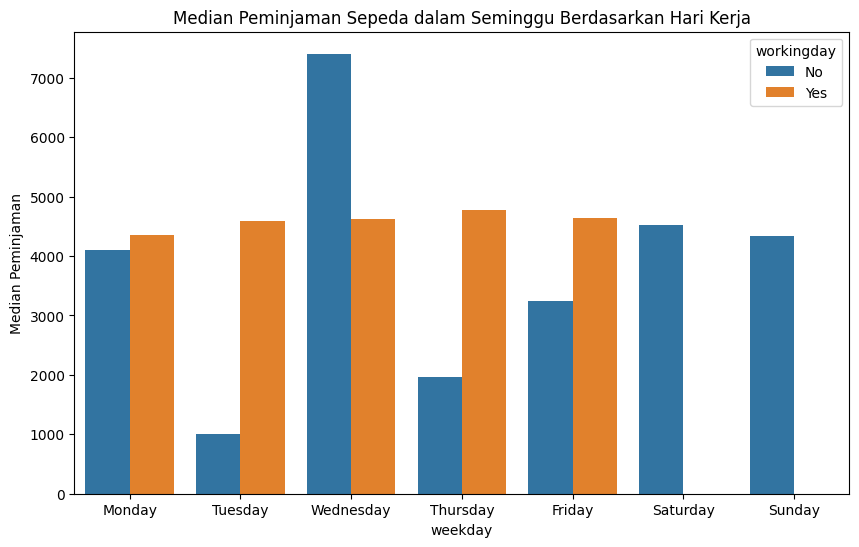

In [130]:
weekday_w = day_bike.groupby(by=["workingday","weekday"]).agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=weekday_w,
    x="weekday",
    y="cnt",
    hue="workingday"

)

plt.title("Median Peminjaman Sepeda dalam Seminggu Berdasarkan Hari Kerja")
plt.ylabel("Median Peminjaman")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan jam:**

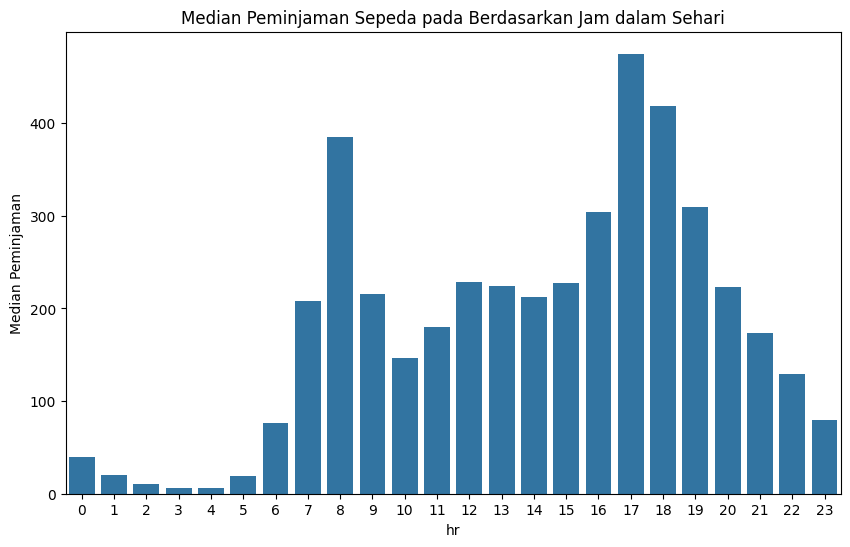

In [133]:
hour = hour_bike.groupby(by="hr").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=hour,
    x="hr",
    y="cnt"

)

plt.title("Median Peminjaman Sepeda pada Berdasarkan Jam dalam Sehari")
plt.ylabel("Median Peminjaman")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan pergantian hari:**

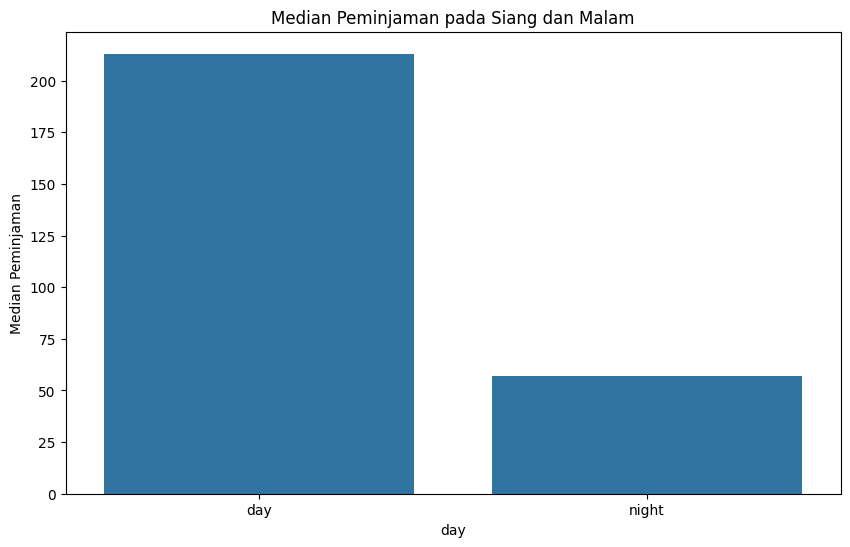

In [134]:
day_night = hour_bike.groupby(by="day").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=day_night,
    x="day",
    y="cnt"

)

plt.title("Median Peminjaman pada Siang dan Malam")
plt.ylabel("Median Peminjaman")
plt.show()

### Pertanyaan 2: Bagaimana tren peminjaman sepeda dari tahun 2011 sampai 2012?

**Plot tren waktu peminjaman sepeda dari tahun 2011 sampai 2012:**

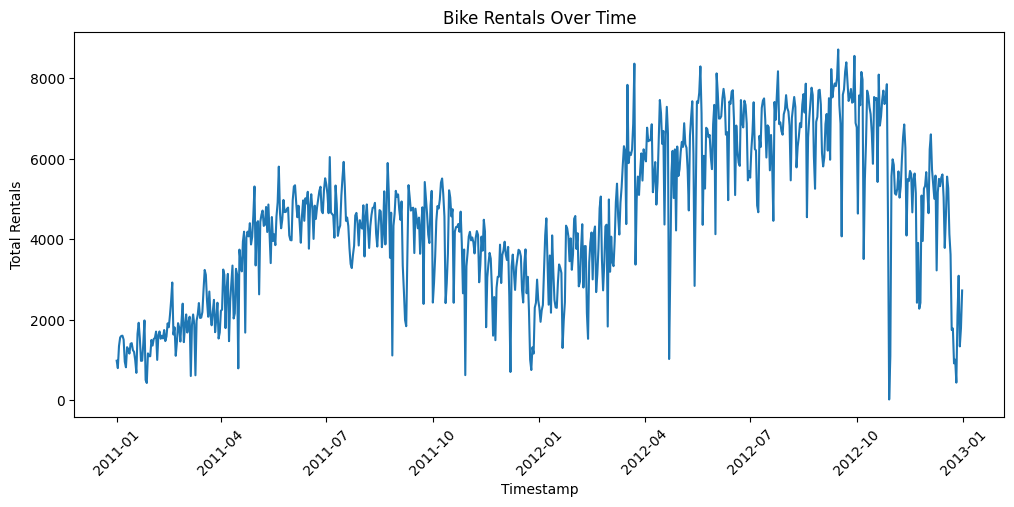

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(day_bike["dteday"], day_bike["cnt"])

plt.title("Bike Rentals Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Berdasarkan heatmap dan pairplot di atas, diketahui bahwa banyaknya peminjaman sepeda **mempunyai korelasi dengan jam (hr) , Suhu (temp dan atemp), dan kelembapan(hum)**. Jam dan suhu memiliki hubungan yang positif dengan jumlah peminjaman sepeda. Sebaliknya, kelembapan memiliki korelasi yang negatif dengan banyaknya peminjaman sepeda. Walaupun begitu, **korelasi ketiganya bersifat lemah ditandai (|korelasi|<0.5)** dan diperkuat dengan **pola pairplot yang cenderung abstrak**.
- Berdasarkan barplot-barplot di atas, diketahui bahwa jumlah peminjaman dalam suatu hari ataupun jam **dipengaruhi oleh musim, cuaca, hari libur, jam, dan pergantian hari (siang dan malam)**. **Musim semi dan panas memiliki jumlah peminjaman yang tinggi** dibandingkan kedua musim lainnya. Hal ini dapat disebabkan kedua musim tersebut lebih hangat dan cocok untuk menggunakan sepeda dibandingkan musim gugur dan salju. Pada kondisi cuaca, **Orang-orang cenderung meminjam sepeda pada cuaca cerah ataupun sedikit berawan**. Hanya sedikit orang yang menggunakan jasa peminjaman sepeda saat hujan atau turun salju ringan. Selain itu, Peminjaman sepeda tidak memiliki perbedaan yang signifikan berbeda pada setiap hari kerja, **tetapi memiliki jumlah peminjam yang beragam saat hari libur**. Terakhir, jumlah peminjaman sepeda dipengaruhi waktu dalam suatu hari. Peminjaman sepeda mengalami **kenaikan di jam sibuk yaitu mulai 10 (siang) sampai 18 (sore)** dan menurun ketika memasuki malam, yaitu aktifitas mulai meredah.
- Berdasarkan lineplot di atas, diketahui bahwa **peminjamaan sepeda memiliki tren musiman.** Pada musim dingin peminjaman sepeda sangatlah rendah namun mengalami kenaikan beriringan dengan pergantian musim ke musim semi dan memiliki puncaknya saat musim panas, serta turun kembali ketika musim gugur. Walaupun polanya terlihat naik-turun, **jumlah peminjaman sepeda pada 2012 mengalami kenaikan dibandingkan dengan jumlah peminjaman sepeda pada 2011**.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan EDA dan visualisasi, jumlah peminjaman sepeda dapat dipengaruhi **musim, cuaca, suhu, kelembapan, hari libur, jam, dan pergantian hari**.
- Berdasarkan visualisasi, **tren peminjaman sepeda dari tahun 2011 sampai 2012 mengalami kenaikan**.